C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


[INFO] Model loaded.

🗣️ Question 1: Tell me about yourself.
🎥 Respond for the next 7 seconds...

🗣️ Question 2: What are your strengths and weaknesses?
🎥 Respond for the next 7 seconds...

🗣️ Question 3: Describe a challenging project you've worked on.
🎥 Respond for the next 7 seconds...

🗣️ Question 4: Why should we hire you?
🎥 Respond for the next 7 seconds...

🗣️ Question 5: Where do you see yourself in 5 years?
🎥 Respond for the next 7 seconds...

🧾 Interview Emotion Summary
----------------------------

❓ Tell me about yourself.
   - Neutral : 20 times
   - Sad     : 5 times
   - Happy   : 8 times
   ⭐ Dominant Emotion: Neutral

❓ What are your strengths and weaknesses?
   - Happy   : 17 times
   - Neutral : 2 times
   - Sad     : 2 times
   - Fear    : 1 times
   ⭐ Dominant Emotion: Happy

❓ Describe a challenging project you've worked on.
   - Fear    : 1 times
   - Sad     : 12 times
   - Neutral : 12 times
   - Happy   : 4 times
   ⭐ Dominant Emotion: Sad

❓ Why should we hir

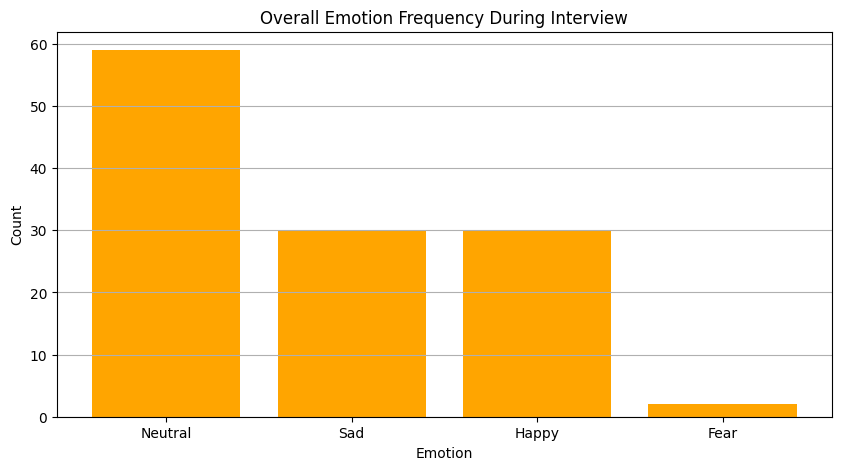


📝 Final Confidence Report
✅ Candidate appeared confident and composed.


In [1]:
# 📦 Install packages
!pip install opencv-python tensorflow numpy matplotlib

# 📚 Import libraries
import cv2
import numpy as np
import tensorflow as tf
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import time

# 📁 Load model
model_path = r"C:\Users\sagni\Downloads\Emotion Aware Virtual Interviewer\model.h5"
model = tf.keras.models.load_model(model_path)
print("[INFO] Model loaded.")

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Preprocess for RGB input
def preprocess_face(face_img):
    face_img = cv2.resize(face_img, (48, 48))
    face_img = face_img.astype('float32') / 255.0
    face_img = np.expand_dims(face_img, axis=0)
    return face_img

# Interview questions
questions = [
    "Tell me about yourself.",
    "What are your strengths and weaknesses?",
    "Describe a challenging project you've worked on.",
    "Why should we hire you?",
    "Where do you see yourself in 5 years?"
]

# Start video
cap = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

question_emotions = defaultdict(list)

for idx, question in enumerate(questions):
    print(f"\n🗣️ Question {idx+1}: {question}")
    print("🎥 Respond for the next 7 seconds...")

    start_time = time.time()
    while time.time() - start_time < 7:  # 7 seconds per answer
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            face_img = frame[y:y+h, x:x+w]
            processed = preprocess_face(face_img)
            pred = model.predict(processed, verbose=0)
            emotion = emotion_labels[np.argmax(pred)]
            question_emotions[question].append(emotion)

            # Draw box and emotion
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(frame, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,255,255), 2)

        cv2.putText(frame, f"Answering: {question}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)
        cv2.imshow('Interview Mode', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            exit()

# Cleanup
cap.release()
cv2.destroyAllWindows()

# 🧾 Summary Report
print("\n🧾 Interview Emotion Summary")
print("----------------------------")
for q in questions:
    counts = Counter(question_emotions[q])
    dominant = counts.most_common(1)[0][0] if counts else 'N/A'
    print(f"\n❓ {q}")
    for emo, cnt in counts.items():
        print(f"   - {emo:8}: {cnt} times")
    print(f"   ⭐ Dominant Emotion: {dominant}")

# 📊 Bar chart of all collected emotions
all_emotions = []
for emolist in question_emotions.values():
    all_emotions.extend(emolist)
final_counts = Counter(all_emotions)

plt.figure(figsize=(10,5))
plt.bar(final_counts.keys(), final_counts.values(), color='orange')
plt.title("Overall Emotion Frequency During Interview")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

# Final feedback
print("\n📝 Final Confidence Report")
if not all_emotions:
    print("No faces were detected.")
else:
    dominant = Counter(all_emotions).most_common(1)[0][0]
    if dominant in ['Happy', 'Neutral']:
        print("✅ Candidate appeared confident and composed.")
    elif dominant in ['Fear', 'Sad', 'Angry']:
        print("⚠️ Candidate showed signs of stress or nervousness.")
    else:
        print("ℹ️ Mixed emotional response detected.")
